# Fig 4.40a long-term climate projections with MAGICC

Plotting the MAGICC data behind fig 4.40a. Note that the solid lines in fig 4.40a and the central values in Table 4.9 are the mean, not the median.

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path

import matplotlib.pyplot as plt
import matplotlib.lines
import pandas as pd
import scmdata

import utils
import utils.plotting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
fig440_data_files = glob.glob(os.path.join(utils.DATA_DIR, "raw", "fig-4-40", "*.nc"))
fig440_data_files

['/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp460_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_rcp45_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp119_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_ssp434_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/fig-4-40/MAGICCv7.5.0_Surface-Air-Temperature-Change_World_rcp85_output_110_ssps_and_rcps_2021_02_17_035314.nc',
 '/data2/ubuntu-znicholls/ar6-wg

<IPython.core.display.Javascript object>

In [5]:
fig440_data = scmdata.run_append([scmdata.ScmRun.from_nc(f) for f in fig440_data_files])
fig440_data

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds

<scmdata.ScmRun (timeseries: 7200, timepoints: 501)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2350-07-01T00:00:00
Meta:
	     climate_model  ensemble_member        model model_family region scenario  \
	0     MAGICCv7.5.0              0.0  unspecified      MAGICC7  World   ssp460   
	1     MAGICCv7.5.0              1.0  unspecified      MAGICC7  World   ssp460   
	2     MAGICCv7.5.0              2.0  unspecified      MAGICC7  World   ssp460   
	3     MAGICCv7.5.0              3.0  unspecified      MAGICC7  World   ssp460   
	4     MAGICCv7.5.0              4.0  unspecified      MAGICC7  World   ssp460   
	...            ...              ...          ...          ...    ...      ...   
	7195  MAGICCv7.5.0            595.0  unspecified      MAGICC7  World   ssp245   
	7196  MAGICCv7.5.0            596.0  unspecified      MAGICC7  World   ssp245   
	7197  MAGICCv7.5.0            597.0  unspecified      MAGICC7  World   ssp245   
	7198  MAGICCv7.5.0            598.0  unspecified      MAGICC

<IPython.core.display.Javascript object>

In [6]:
fig440_data.get_unique_meta("scenario")

['ssp460',
 'rcp45',
 'ssp119',
 'ssp434',
 'rcp85',
 'ssp126',
 'ssp370',
 'rcp26',
 'rcp60',
 'ssp534-over',
 'ssp585',
 'ssp245']

<IPython.core.display.Javascript object>

-0.8518134056316156

(1950.0, 2300.0)

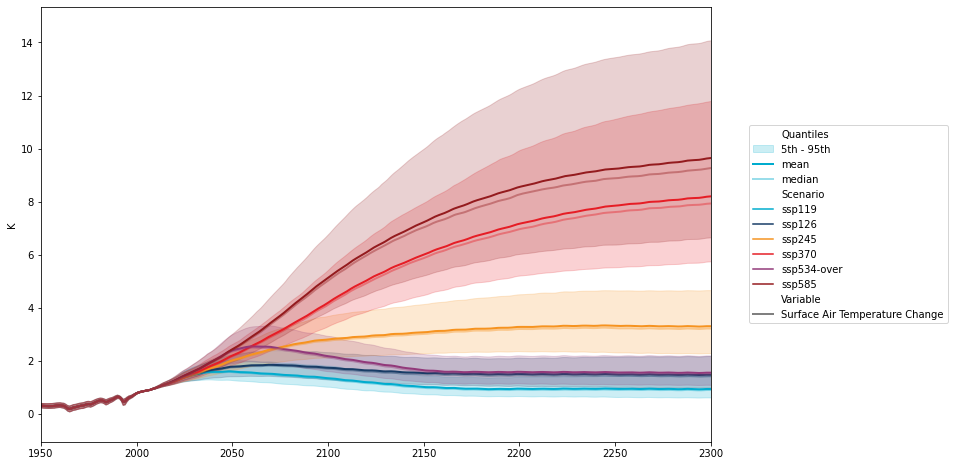

<IPython.core.display.Javascript object>

In [7]:
# set all ensemble members relative to 1995 - 2014
pdf = fig440_data.filter(
    #     year=range(2015, 2300 + 1),
    scenario=["ssp119", "ssp126", "ssp245", "ssp534-over", "ssp585", "ssp370"],
    #     scenario=["ssp119", "ssp126", "ssp245", "ssp534-over"],
).relative_to_ref_period_mean(year=range(1995, 2014 + 1))

# calculate historical adjustment
# note that there's a typo in the calculation, it should be
# `range(1850, 1900 + 1)` but this typo is needed to reproduce
# Table 4.9 exactly
# (I wouldn't use this historical adjustment method, I would 
# calculate the median of the 1995-2014 period rel. to 
# 1850 - 1900 across all ensemble members and then adjust this 
# median to match the assessment by shifting the entire ensemble 
# as one but here we are)
hist_adjust = float(
    pdf.filter(year=range(1850, 1900), scenario="ssp119")
    .process_over("ensemble_member", "mean")
    .mean(axis=1)
)
display(hist_adjust)

# adjust the ensemble
pdf -= hist_adjust

# calculate quantities of interest
mean = pdf.process_over("ensemble_member", "mean")
mean["quantile"] = "mean"

median = pdf.process_over("ensemble_member", "median")
median["quantile"] = "median"

q05 = pdf.process_over("ensemble_member", "quantile", q=0.05)
q05["quantile"] = "0.05"

q95 = pdf.process_over("ensemble_member", "quantile", q=0.95)
q95["quantile"] = "0.95"

pdf = scmdata.run_append([scmdata.ScmRun(df) for df in [mean, median, q05, q95]])

fig, ax = plt.subplots(figsize=(12, 8))

ax, lh = pdf.plumeplot(
    quantiles_plumes=[((0.05, 0.95), 0.2), (("mean",), 1.0), (("median",), 0.4)],
    pre_calculated=True,
    palette=utils.plotting.SCENARIO_PALETTE,
    time_axis="year",
    ax=ax,
)

scenarios = {}
for v in lh:
    if isinstance(v, matplotlib.lines.Line2D):
        label = v.get_label()
        if label.startswith("ssp"):
            scenarios[label] = v


ax.legend(
    handles=lh[:5] + [scenarios[s] for s in sorted(scenarios.keys())] + lh[-2:],
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
)
ax.set_xlim([1950, 2300])
# plt.savefig("outname.pdf")

In [8]:
(
    pdf.filter(year=2300)
    .timeseries(time_axis="year")[2300]
    .unstack("quantile")[["mean", "0.05", "0.95", "median"]]
    .round(1)
)

quantile                                                                                                                                             mean  \
climate_model model       model_family reference_period_end_year reference_period_start_year region scenario    unit variable                               
MAGICCv7.5.0  unspecified MAGICC7      2014                      1995                        World  ssp119      K    Surface Air Temperature Change   0.9   
                                                                                                    ssp126      K    Surface Air Temperature Change   1.5   
                                                                                                    ssp245      K    Surface Air Temperature Change   3.3   
                                                                                                    ssp370      K    Surface Air Temperature Change   8.2   
                                                                                                    ssp534-over K    Surface Air Temperature Change   1.6   
                                                                                                    ssp585      K    Surface Air Temperature Change   9.6   

quantile                                                                                                                                             0.05  \
climate_model model       model_family reference_period_end_year reference_period_start_year region scenario    unit variable                               
MAGICCv7.5.0  unspecified MAGICC7      2014                      1995                        World  ssp119      K    Surface Air Temperature Change   0.6   
                                                                                                    ssp126      K    Surface Air Temperature Change   1.0   
                                                                                                    ssp245      K    Surface Air Temperature Change   2.3   
                                                                                                    ssp370      K    Surface Air Temperature Change   5.7   
                                                                                                    ssp534-over K    Surface Air Temperature Change   1.1   
                                                                                                    ssp585      K    Surface Air Temperature Change   6.6   

quantile                                                                                                                                             0.95  \
climate_model model       model_family reference_period_end_year reference_period_start_year region scenario    unit variable                               
MAGICCv7.5.0  unspecified MAGICC7      2014                      1995                        World  ssp119      K    Surface Air Temperature Change   1.4   
                                                                                                    ssp126      K    Surface Air Temperature Change   2.2   
                                                                                                    ssp245      K    Surface Air Temperature Change   4.6   
                                                                                                    ssp370      K    Surface Air Temperature Change  11.8   
                                                                                                    ssp534-over K    Surface Air Temperature Change   2.2   
                                                                                                    ssp585      K    Surface Air Temperature Change  14.1   

quantile                                                                                                                                             median  
climate_model model       model_family reference_period_end_year refere

<IPython.core.display.Javascript object>